
###Subtopic: Usage Pattern Analysis & Product Engagement:

###Dataset: E-Commerce Customer Churn




In [3]:
# --- 1. Import Required Libraries ---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
# --- 2. Load the Dataset ---
# Note: Ensure the dataset CSV file is correctly placed in your working directory or update the path below.
file_path = "/content/Raw_Dataset_1.csv"
df = pd.read_csv(file_path)


In [6]:
# --- 3. Basic Information About the Dataset ---
# Previewing structure, data types, and initial rows to understand the dataset layout
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   float64
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3333 non-null   int64  
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

(None,
    account length  location code  user id credit card info save push status  \
 0             128            415  3824657                    no         yes   
 1             107            415  3717191                    no         yes   
 2             137            415  3581921                    no          no   
 3              84            408  3759999                   yes          no   
 4              75            415  3306626                   yes          no   
 
    add to wishlist  desktop sessions  app sessions  desktop transactions  \
 0               25               265     63.048381                    17   
 1               26               162     37.829028                    17   
 2                0               243     57.444080                    10   
 3                0               299     71.454831                     5   
 4                0               167     39.230103                    13   
 
    total product detail views  session duratio

In [7]:
# --- 4. Data Cleaning and Type Conversion ---
# Some numerical columns are stored as objects due to comma as decimal separator.
# We'll convert them to float for numerical analysis.
cols_to_convert = ["avg order value", "discount rate per visited products",
                   "product detail view per app session", "add to cart per session"]
for col in cols_to_convert:
    df[col] = df[col].str.replace(',', '.').astype(float)


In [8]:
# --- 5. Checking for Missing Values ---
df['churn'].value_counts()

,count
churn,
0,2850
1,483


In [9]:
# --- 6. Descriptive Statistics ---
# Get summary statistics for key numerical columns
print("\nDescriptive Statistics:")
print(df[cols_to_convert].describe())


Descriptive Statistics:
       avg order value  discount rate per visited products  \
count      3333.000000                         3333.000000   
mean        200.872037                            9.039325   
std          50.573847                            2.275873   
min          23.200000                            1.040000   
25%         167.000000                            7.520000   
50%         201.200000                            9.050000   
75%         235.300000                           10.590000   
max         395.000000                           17.770000   

       product detail view per app session  add to cart per session  
count                          3333.000000              3333.000000  
mean                             10.237294                 2.764581  
std                               2.791840                 0.753773  
min                               0.000000                 0.000000  
25%                               8.500000                 2.30000

###	Examining the Impact of Transaction Frequency on Churn Likelihood

<ipython-input-7-1bcf24825d77>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='app transactions', data=df,palette='Set2')


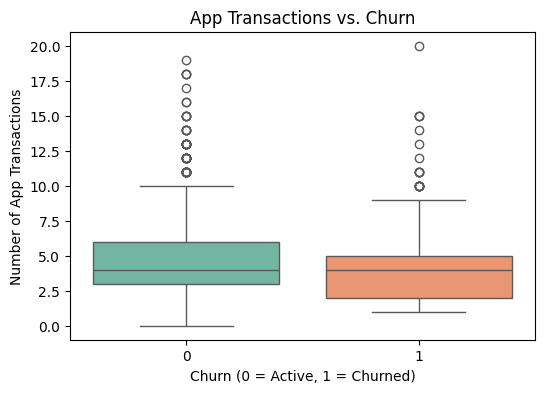

In [ ]:
# 1) Box plot: App Transactions vs. Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='churn', y='app transactions', data=df,palette='Set2')
plt.title("App Transactions vs. Churn")
plt.xlabel("Churn (0 = Active, 1 = Churned)")
plt.ylabel("Number of App Transactions")
plt.show()




Active users make more app transactions on average than churned users.
Higher app-based engagement correlates with better retention.

### Wishlist Engagement: Does Adding Items Reduce Churn

<ipython-input-8-2b5641b47779>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wishlist_avg, x='churn', y='add to wishlist', palette='Set2')


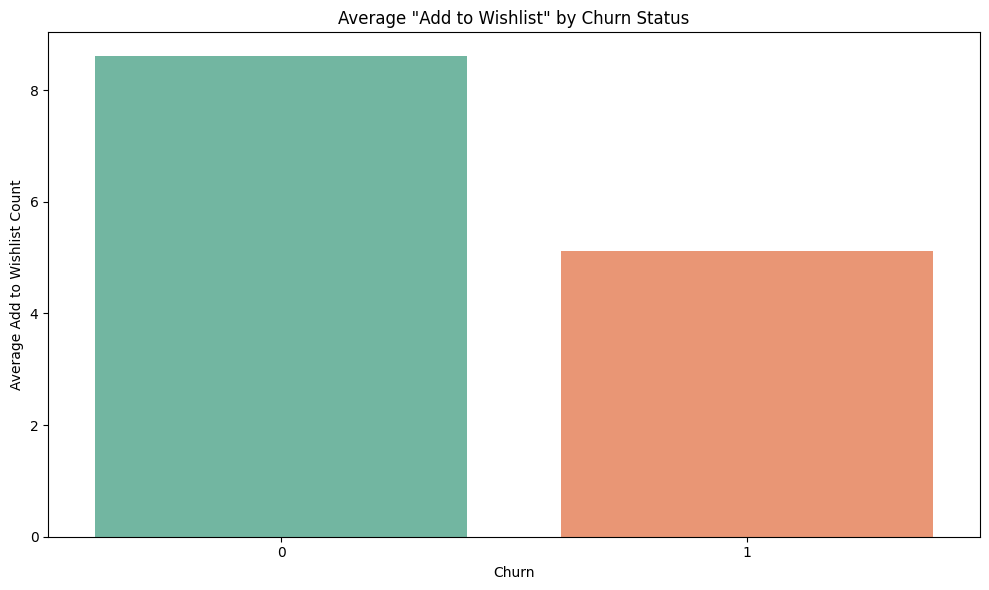

In [ ]:
# 2) Bar plot: Wishlist Additions and Churn Rate
wishlist_avg = df.groupby('churn')['add to wishlist'].mean().reset_index()

# Create a bar plot with averages
plt.figure(figsize=(10, 6))
sns.barplot(data=wishlist_avg, x='churn', y='add to wishlist', palette='Set2')

# Add a title and labels
plt.title('Average "Add to Wishlist" by Churn Status')
plt.ylabel('Average Add to Wishlist Count')
plt.xlabel('Churn')

plt.tight_layout()
plt.show()




Churned users tend to add fewer products to their wishlist.
Users who actively save items for later are more likely to stay

### The Impact of Push Notifications on Customer Retention

<ipython-input-9-121c463b855a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=push_churn_rate.index, y=push_churn_rate.values,palette='Set2')


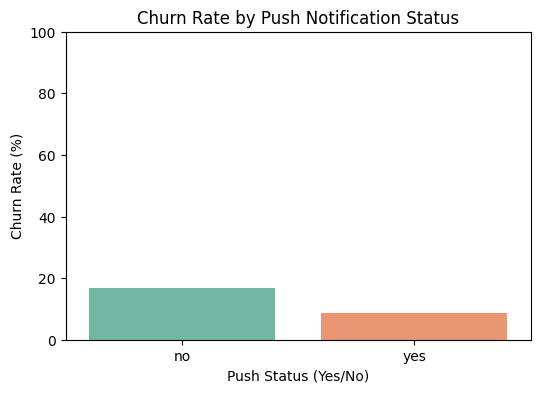

In [ ]:
#3) churn rate for push status categories
# Calculate churn rate for push status categories
push_churn_rate = df.groupby('push status')['churn'].mean() * 100

# Plot churn rate for push notification status
plt.figure(figsize=(6, 4))
sns.barplot(x=push_churn_rate.index, y=push_churn_rate.values,palette='Set2')
plt.title("Churn Rate by Push Notification Status")
plt.xlabel("Push Status (Yes/No)")
plt.ylabel("Churn Rate (%)")
plt.ylim(0, 100)
plt.show()

Users who receive push notifications have a significantly lower churn rate compared to those who don't, suggesting that push engagement helps in retaining customers.

### Do Customers with Higher App Sessions Churn Less

<ipython-input-10-a769b7c5a4f8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='app sessions', data=df, palette='Set2')


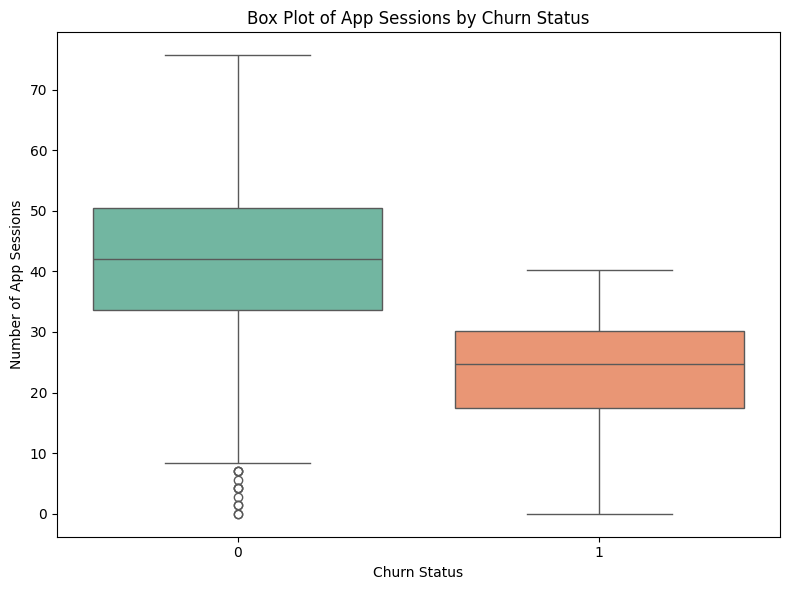

In [ ]:
#4) App Sessions by churn status
import seaborn as sns

# Create a box plot for app sessions by churn status
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='app sessions', data=df, palette='Set2')

# Titles and labels
plt.title('Box Plot of App Sessions by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of App Sessions')

plt.tight_layout()
plt.show()


 Users who did not churn tend to have significantly higher numbers of app sessions, suggesting frequent usage is strongly associated with retention.

###	Do Customers with Higher Desktop Sessions Churn Less

<ipython-input-11-0d44d9510478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='desktop sessions', data=df, palette='Set2')


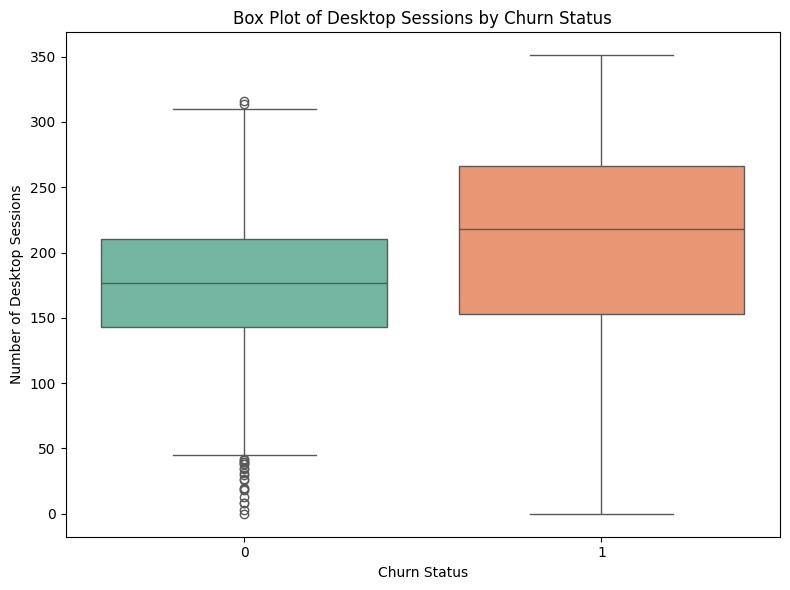

In [ ]:
#Desktop sessions by churn status
# Create a box plot for desktop sessions by churn status
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='desktop sessions', data=df, palette='Set2')

# Titles and labels
plt.title('Box Plot of Desktop Sessions by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Desktop Sessions')

plt.tight_layout()
plt.show()

Churned users tend to have a wider and higher distribution of desktop sessions, suggesting that high desktop usage alone may not ensure retention and might reflect browsing without strong engagement.



### Which Platform Drives Higher Customer Retention: App or Desktop

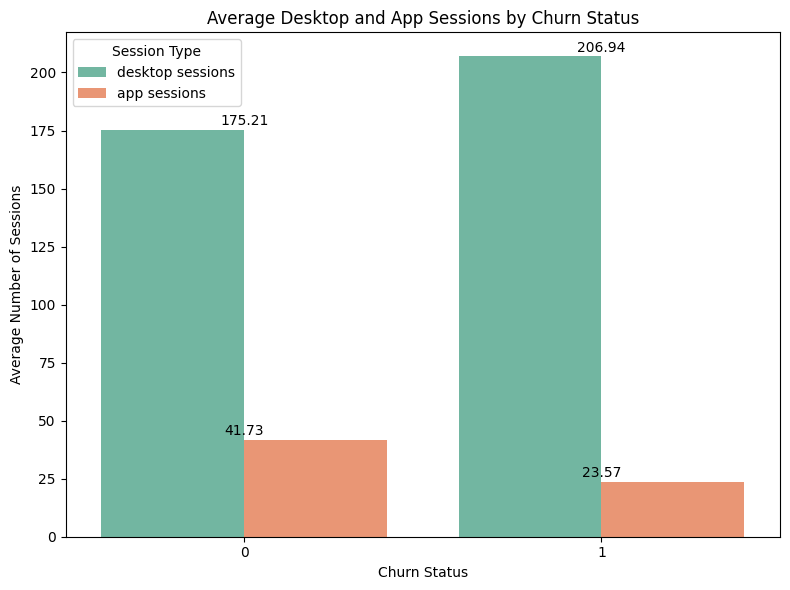

In [ ]:
# Comparing  Desktop vs App session
# Calculate average sessions for both app and desktop by churn status
avg_sessions = df.groupby('churn')[['desktop sessions', 'app sessions']].mean().reset_index()

# Melt the data for better visualization
avg_sessions_melted = avg_sessions.melt(id_vars=['churn'], var_name='Session Type', value_name='Average Sessions')

# Create a bar plot comparing desktop and app sessions by churn status
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='Average Sessions', hue='Session Type', data=avg_sessions_melted, palette='Set2')

# Titles and labels
plt.title('Average Desktop and App Sessions by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Number of Sessions')
plt.legend(title='Session Type')

# Annotate bars with values
for index, row in avg_sessions_melted.iterrows():
    plt.text(row['churn'], row['Average Sessions'] + 2, f"{row['Average Sessions']:.2f}", ha='center')

plt.tight_layout()
plt.show()



While churned users show more desktop sessions on average, retained users have significantly higher app session activity—indicating that mobile engagement plays a stronger role in customer retention than desktop usage alone.